In [21]:
# Arshul Shaik
# February 9, 2024
# Module Assignment 1
import pandas as pd
import matplotlib.pyplot as plt

In [22]:


# Load the CSV file into a DataFrame
data = pd.read_csv('layoffs.csv')

# Display the first few rows of the dataset
print(data.head())

# Exploratory Data Analysis

## Summary statistics
print(data.describe())



    company       location   industry  total_laid_off  percentage_laid_off  \
0  New Work        Hamburg   Consumer           400.0                  NaN   
1  Playtika       Tel Aviv   Consumer           300.0                 0.10   
2   Discord    SF Bay Area   Consumer           170.0                 0.17   
3    Inmobi      Bengaluru  Marketing           125.0                 0.05   
4   Audible  New York City      Media           100.0                 0.05   

         date     stage        country  funds_raised  
0  2024-01-11  Post-IPO        Germany           NaN  
1  2024-01-11  Post-IPO         Israel           NaN  
2  2024-01-11  Series H  United States         995.0  
3  2024-01-11   Unknown          India         320.0  
4  2024-01-11  Acquired  United States          14.0  
       total_laid_off  percentage_laid_off   funds_raised
count     2189.000000          2141.000000    2962.000000
mean       242.146185             0.277458     775.056616
std        767.384119      

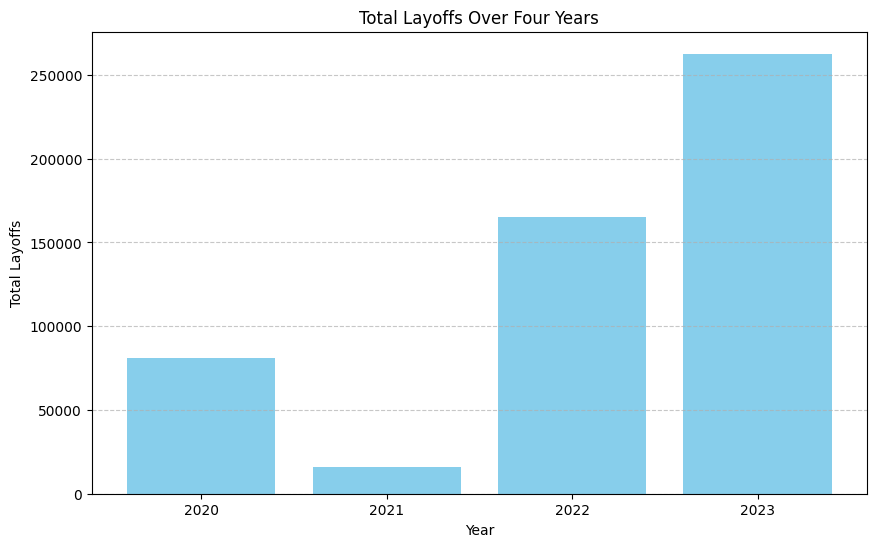

Summary of Total Layoffs Over Four Years:
Year 2020: Total layoffs = 80998.0
Year 2021: Total layoffs = 15823.0
Year 2022: Total layoffs = 164969.0
Year 2023: Total layoffs = 262682.0


In [23]:
data['date'] = pd.to_datetime(data['date'])

# Extracting data for each year
df_2020 = data[data['date'].dt.year == 2020]
df_2021 = data[data['date'].dt.year == 2021]
df_2022 = data[data['date'].dt.year == 2022]
df_2023 = data[data['date'].dt.year == 2023]

# Calculating total layoffs for each year
total_laid_off_2020 = df_2020['total_laid_off'].sum()
total_laid_off_2021 = df_2021['total_laid_off'].sum()
total_laid_off_2022 = df_2022['total_laid_off'].sum()
total_laid_off_2023 = df_2023['total_laid_off'].sum()

# Creating a bar plot
years = [2020, 2021, 2022, 2023]
total_laid_off = [total_laid_off_2020, total_laid_off_2021, total_laid_off_2022, total_laid_off_2023]

plt.figure(figsize=(10, 6))
plt.bar(years, total_laid_off, color='skyblue')
plt.title('Total Layoffs Over Four Years')
plt.xlabel('Year')
plt.ylabel('Total Layoffs')
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


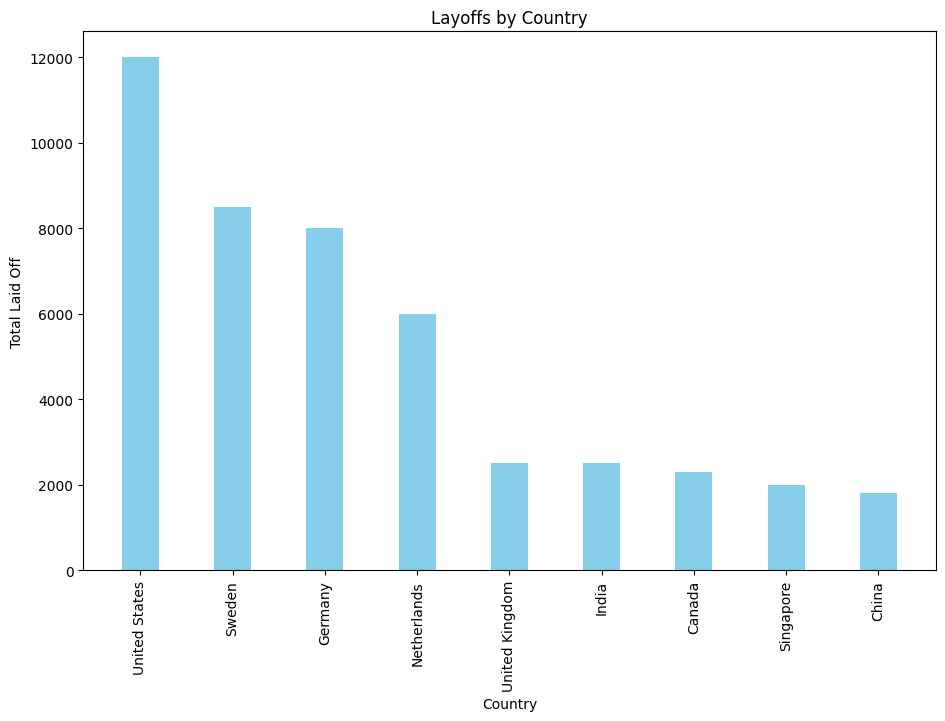

In [26]:
## Sort data by total_laid_off in descending order and select top 50 entries
data_sorted = data.sort_values(by='total_laid_off', ascending=False).head(50)

## Bar plot for comparative analysis of layoffs by country
plt.figure(figsize=(11,7))
plt.bar(data_sorted['country'], data_sorted['total_laid_off'], color='skyblue', width=0.4)
plt.xlabel('Country')
plt.ylabel('Total Laid Off')
plt.title('Layoffs by Country')
plt.xticks(rotation=90)
plt.show()


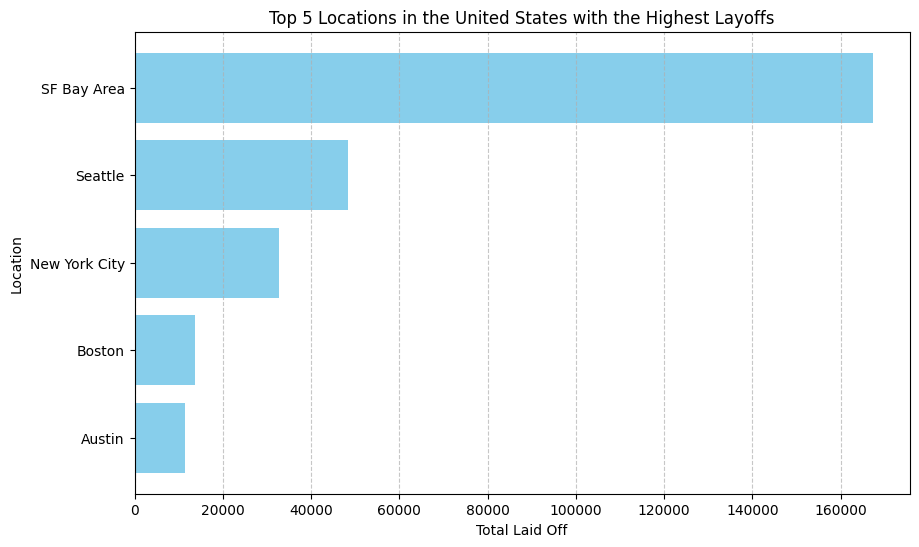

In [34]:
# Filter data for the USA
us_df = data[data['country'] == 'United States']

# Group data by location and calculate total layoffs for each location
location_stats = us_df.groupby('location')['total_laid_off'].sum().reset_index()

# Sort data by total_laid_off in descending order and select top 5 locations
top_5_locations = location_stats.sort_values(by='total_laid_off', ascending=False).head(5)

# Horizontal bar plot for the top 5 locations in the United States with the highest layoffs
plt.figure(figsize=(10, 6))
plt.barh(top_5_locations['location'], top_5_locations['total_laid_off'], color='skyblue')
plt.xlabel('Total Laid Off')
plt.ylabel('Location')
plt.title('Top 5 Locations in the United States with the Highest Layoffs')
plt.gca().invert_yaxis()  # Invert y-axis to display the location with the highest layoffs on top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

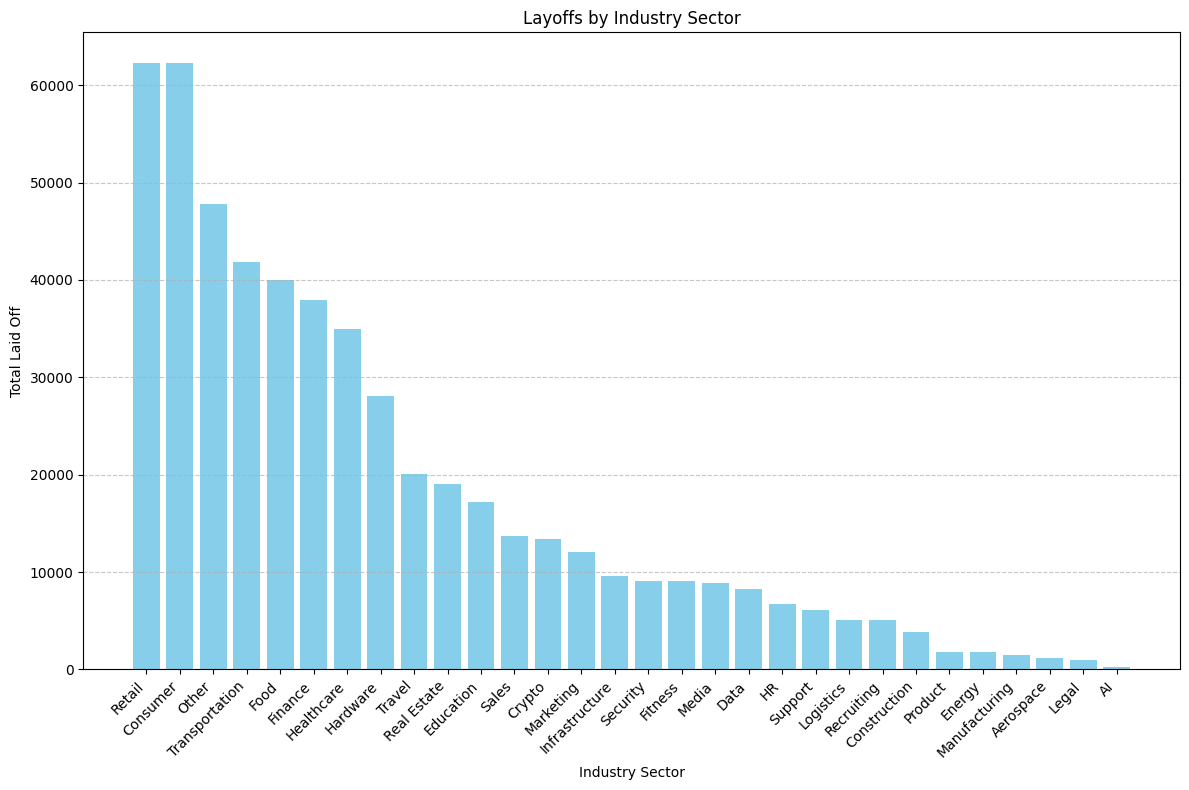

In [33]:
# Group data by industry sector and calculate total layoffs for each sector
industry_stats = data.groupby('industry')['total_laid_off'].sum().reset_index()

# Sort data by total layoffs in descending order
industry_stats_sorted = industry_stats.sort_values(by='total_laid_off', ascending=False)

# Bar plot for layoffs by industry sector
plt.figure(figsize=(12, 8))
plt.bar(industry_stats_sorted['industry'], industry_stats_sorted['total_laid_off'], color='skyblue')
plt.xlabel('Industry Sector')
plt.ylabel('Total Laid Off')
plt.title('Layoffs by Industry Sector')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


/var/folders/zh/rlvxg81x4rd8v5wd51dmxb3h0000gn/T/ipykernel_5428/1304340680.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_layoffs_2023 = data_2023.resample('M', on='date')['total_laid_off'].sum()


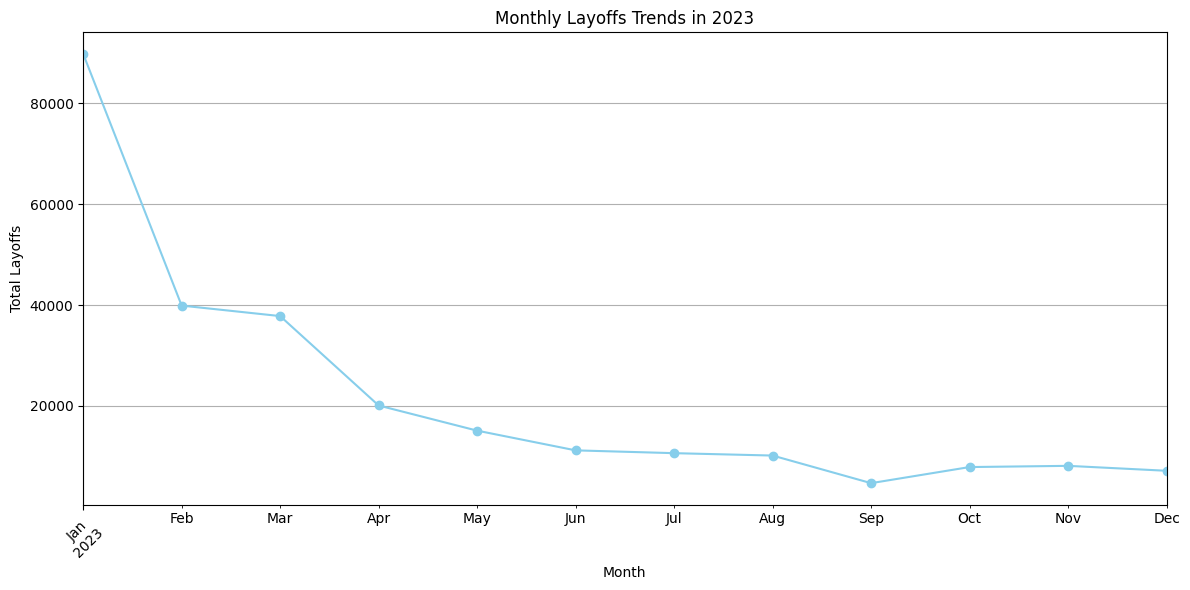

In [36]:

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Filter data for the year 2023
data_2023 = data[(data['date'] >= '2023-01-01') & (data['date'] <= '2023-12-31')]

# Group data by month and calculate total layoffs for each month in 2023
monthly_layoffs_2023 = data_2023.resample('M', on='date')['total_laid_off'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_layoffs_2023.plot(marker='o', color='skyblue')
plt.title('Monthly Layoffs Trends in 2023')
plt.xlabel('Month')
plt.ylabel('Total Layoffs')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
